# Lab: Naive Bayes Classifier and Bayesian Statistics

By the end of this lab you will be able to:

- Explain and apply Bayes Theorem within a classification context.
- Implement a Naive Bayes Classifier using basic Python (without sklearn) to analyze a spam text example.
- Apply Laplace smoothing to adjust probability estimates when encountering zero counts.
- Implement a Gaussian Naive Bayes Classifier using sklearn on the iris dataset, including a simple hyperparameter search.

## Review Bayes Theorem & Naive Bayes Classifier (Plug and Play)

In this exercise, we calculate the posterior probability that a text is spam, given the presence of a specific word ("USPS"). 

We start with a dataset of `spam` and `non-spam` texts, then use Bayes' Theorem to compute the desired probability. We first calculate our prior probability of spam and normal text messages by simply calculating the ratio of text messages received. 

This is the core of the Naive Bayes classifier. 

In [ ]:
# Spam text data
spam_texts = [
    "Hello, your USPS package was not able to be delivered. Click here!",
    "USPS package not able to be delivered!",
    "This is the USPS. Give us $200"
]

# Non-spam text data
normal_texts = [
    "It’s Farukh. Quick tell me what the central limit theorem is.",
    "I'm stopping by the USPS, do you want any stamps?",
]

# use ratio of spam to not spam texts to calculate initial probability
spam_probability = len(spam_texts) / (len(spam_texts) + len(normal_texts))
not_spam_probability = len(normal_texts) / (len(spam_texts) + len(normal_texts))

print(f"Initial probability of spam {spam_probability}")
print(f"Initial probability of not spam {not_spam_probability}")

Initial probability of spam 0.6
Initial probability of not spam 0.4


By simply iterating through each word that **shows up in every single text**, we can count up the frequency for each word that shows up in our entire [corpus](https://en.wikipedia.org/wiki/Text_corpus).

We save this data in our dictionary, where each word is a unique key, and the associated value is the number of times this word shows up in a specific category of text.

In [421]:
import re

# Prepare dictionaries to count up the frequency of words in both categories
spam_frequencies = {}
nospam_frequencies = {}

# count up frequencies for spam texts
for text in spam_texts:
    # remove all punctuation marks (can punctuation be used to classify spam?)
    no_punctuation = re.sub(r"[.?!,']", "", text)

    # lower all characters and split text and count up frequencies
    words = no_punctuation.lower().split()
    for w in words:
        if w not in spam_frequencies:
            spam_frequencies[w] = 1
        else:
            spam_frequencies[w] += 1

# add up all frequencies to get number of words in spam
total_spam = sum(spam_frequencies.values())

print(f"{total_spam} words in spam")

26 words in spam


In [422]:
# count up frequencies for normal texts
for text in normal_texts:
    # remove all punctuation marks (can punctuation be used to classify spam?)
    no_punctuation = re.sub(r"[.?!,']", "", text)

    # split text and count up frequencies
    words = no_punctuation.lower().split()
    for w in words:
        if w not in nospam_frequencies:
            nospam_frequencies[w] = 1
        else:
            nospam_frequencies[w] += 1

total_not_spam = sum(nospam_frequencies.values())

print(f"{total_not_spam} words in non-spam")

21 words in non-spam


In [423]:
total_words = total_not_spam + total_spam

print(f"{total_words} words across both classes")

47 words across both classes


However, this is not a sufficient spam classifier until we can calculate the frequencies of words that **don't** show up in another category.

Here, we iterate through both dictionaries. If we find a word in one dictionary that does not exist in another, we create a key value pairing where the word points to a value of `0` (aka `0%` likelihood that this word will show up in a separate category).

In [424]:
# we also need to include words that dont show up in both dictionaries and assign them a probability of 0
spam_words = list(spam_frequencies.keys())
normal_words = list(nospam_frequencies.keys())

for w in spam_words:
    if w not in nospam_frequencies:
        nospam_frequencies[w] = 0

for w in normal_words:
    if w not in spam_frequencies:
        spam_frequencies[w] = 0

print("spam probabilities", spam_frequencies)
print("normal word probabilities",nospam_frequencies)

spam probabilities {'click': 1, 'here': 1, 'hello': 1, 'your': 1, 'usps': 3, 'package': 2, 'was': 1, 'not': 2, 'able': 2, 'to': 2, 'be': 2, 'delivered': 2, 'give': 1, 'us': 1, '$200': 1, 'this': 1, 'is': 1, 'the': 1, 'tell': 0, 'me': 0, 'what': 0, 'central': 0, 'limit': 0, 'theorem': 0, 'quick': 0, 'it’s': 0, 'farukh': 0, 'do': 0, 'you': 0, 'want': 0, 'any': 0, 'stamps': 0, 'im': 0, 'stopping': 0, 'by': 0}
normal word probabilities {'tell': 1, 'me': 1, 'what': 1, 'the': 2, 'central': 1, 'limit': 1, 'theorem': 1, 'is': 1, 'quick': 1, 'it’s': 1, 'farukh': 1, 'do': 1, 'you': 1, 'want': 1, 'any': 1, 'stamps': 1, 'im': 1, 'stopping': 1, 'by': 1, 'usps': 1, 'click': 0, 'here': 0, 'hello': 0, 'your': 0, 'package': 0, 'was': 0, 'not': 0, 'able': 0, 'to': 0, 'be': 0, 'delivered': 0, 'give': 0, 'us': 0, '$200': 0, 'this': 0}


We then calculate the probability of a word showing up in a category of text (`spam` vs `non-spam`) by dividing each frequency by the total number of texts for that category. This normalizes our data and gives us a conditional probability that a word shows up in either a `spam` or `non-spam` text.

In [425]:
spam_prob = {}
nospam_prob = {}

# normalize both frequency tables (divide by number of words that show up in both categories
for w in spam_frequencies:
    spam_prob[w] = round(spam_frequencies[w] / total_spam, 2)

for w in nospam_frequencies:
    nospam_prob[w] = round(nospam_frequencies[w] / total_not_spam, 2)

print("spam frequency", spam_prob)
print("normal word frequency", nospam_prob)

spam frequency {'click': 0.04, 'here': 0.04, 'hello': 0.04, 'your': 0.04, 'usps': 0.12, 'package': 0.08, 'was': 0.04, 'not': 0.08, 'able': 0.08, 'to': 0.08, 'be': 0.08, 'delivered': 0.08, 'give': 0.04, 'us': 0.04, '$200': 0.04, 'this': 0.04, 'is': 0.04, 'the': 0.04, 'tell': 0.0, 'me': 0.0, 'what': 0.0, 'central': 0.0, 'limit': 0.0, 'theorem': 0.0, 'quick': 0.0, 'it’s': 0.0, 'farukh': 0.0, 'do': 0.0, 'you': 0.0, 'want': 0.0, 'any': 0.0, 'stamps': 0.0, 'im': 0.0, 'stopping': 0.0, 'by': 0.0}
normal word frequency {'tell': 0.05, 'me': 0.05, 'what': 0.05, 'the': 0.1, 'central': 0.05, 'limit': 0.05, 'theorem': 0.05, 'is': 0.05, 'quick': 0.05, 'it’s': 0.05, 'farukh': 0.05, 'do': 0.05, 'you': 0.05, 'want': 0.05, 'any': 0.05, 'stamps': 0.05, 'im': 0.05, 'stopping': 0.05, 'by': 0.05, 'usps': 0.05, 'click': 0.0, 'here': 0.0, 'hello': 0.0, 'your': 0.0, 'package': 0.0, 'was': 0.0, 'not': 0.0, 'able': 0.0, 'to': 0.0, 'be': 0.0, 'delivered': 0.0, 'give': 0.0, 'us': 0.0, '$200': 0.0, 'this': 0.0}


Now that we finally have a dictionary that represents our frequency table, we are able to calculate the probability that a new text is either spam or not spam! 

Let's start with the simple text, `USPS`. Since this is just one word, we do not need to apply any sort of text splitting or punctuation removal. However, we still need to make this lowercase for this code to work, and then we can calculate our likelihood.

We can calculate the likelihood that this text message is a spam text by multiplying our prior probability of spam (0.6) by the probability of the word `USPS` showing up in a spam text (0.12).

$$ P(Spam|"USPS") = P(Spam)P("USPS"|Spam) $$

As we established in the slides, it is not necessary to divide this value by the probability of `USPS` throughout all texts, as this is a constant amongst all classes.

In [426]:
new_text1 = "USPS"

new_text1 = new_text1.lower()

spam_likelihood = spam_probability * spam_prob[new_text1]

print(f"Likelihood of spam is {spam_likelihood}")

Likelihood of spam is 0.072


Recall that this probability doesn't have any importance until we compare it to the probability of this text coming from a non-spam number.

$$ P(Not Spam|"Phone") = P(Not Spam)P("Phone"|Not Spam) $$

In [427]:
not_spam_likelihood = not_spam_probability * nospam_prob[new_text1]

print(f"Likelihood of not spam is {not_spam_likelihood}")

Likelihood of not spam is 0.020000000000000004


As we note 0.07 > 0.02, so we **must state this text is spam**. 

Let's now observe a longer example where we must loop through all relevant probabilities in our frequency table.

In [428]:
new_text2 = "USPS $200"

# apply text transformation
new_text2 = new_text2.replace(".", "").replace("!", "")
new_text2 = new_text2.lower().split()

spam_likelihood = spam_probability
not_spam_likelihood = not_spam_probability

for w in new_text2:
    spam_likelihood *= spam_prob[w]
    not_spam_likelihood *= nospam_prob[w]

print(f"Likelihood of spam is {spam_likelihood}")
print(f"Likelihood of not spam is {not_spam_likelihood}")

Likelihood of spam is 0.0028799999999999997
Likelihood of not spam is 0.0


## Laplace Smoothing

When counting word frequencies, it often happens that some words do not appear in a dataset for one of the classes (i.e., zero counts). This leads to incorrect estimations.

In [429]:
new_text3 = "Farukh USPS $200"

# apply text transformation
new_text3 = new_text3.replace(".", "").replace("!", "")
new_text3 = new_text3.lower().split()

spam_likelihood = spam_probability
not_spam_likelihood = not_spam_probability

for w in new_text3:
    # for simplicity, we will ignore words we haven't seen
    if w in spam_prob and w in nospam_prob:
        spam_likelihood *= spam_prob[w]
        not_spam_likelihood *= nospam_prob[w]

print(f"Likelihood of spam is {spam_likelihood}")
print(f"Likelihood of notspam is {not_spam_likelihood}")

Likelihood of spam is 0.0
Likelihood of notspam is 0.0


Even though this is a spam text, note that one word throws off the entire estimation.

Laplace smoothing addresses this by adding a constant to all counts. The cell below demonstrates a basic plug-and-play implementation using word counts from spam messages.

In [ ]:
# TODO: play around with this value, see what happens to your frequency table
alpha = 1

# calculate vocab size (number of unique words across both sets)
vocab_size = len(set(spam_prob).union(set(nospam_prob)))

# recalculate each probability using laplace smoothing
smoothed_spam_prob = {}
smoothed_nospam_prob = {}

# calculate smoothed probabilities
for w in spam_frequencies:
    smoothed_spam_prob[w] = round((spam_frequencies[w] + alpha) / (total_spam + (alpha * vocab_size)), 2)

for w in nospam_frequencies:
    smoothed_nospam_prob[w] = round((nospam_frequencies[w] + alpha) / (total_not_spam + (alpha * vocab_size)), 2)

print("smoothed spam probabilities", smoothed_spam_prob)
print("smoothed normal word probabilities",smoothed_nospam_prob)

smoothed spam probabilities {'click': 0.03, 'here': 0.03, 'hello': 0.03, 'your': 0.03, 'usps': 0.07, 'package': 0.05, 'was': 0.03, 'not': 0.05, 'able': 0.05, 'to': 0.05, 'be': 0.05, 'delivered': 0.05, 'give': 0.03, 'us': 0.03, '$200': 0.03, 'this': 0.03, 'is': 0.03, 'the': 0.03, 'tell': 0.02, 'me': 0.02, 'what': 0.02, 'central': 0.02, 'limit': 0.02, 'theorem': 0.02, 'quick': 0.02, 'it’s': 0.02, 'farukh': 0.02, 'do': 0.02, 'you': 0.02, 'want': 0.02, 'any': 0.02, 'stamps': 0.02, 'im': 0.02, 'stopping': 0.02, 'by': 0.02}
smoothed normal word probabilities {'tell': 0.04, 'me': 0.04, 'what': 0.04, 'the': 0.05, 'central': 0.04, 'limit': 0.04, 'theorem': 0.04, 'is': 0.04, 'quick': 0.04, 'it’s': 0.04, 'farukh': 0.04, 'do': 0.04, 'you': 0.04, 'want': 0.04, 'any': 0.04, 'stamps': 0.04, 'im': 0.04, 'stopping': 0.04, 'by': 0.04, 'usps': 0.04, 'click': 0.02, 'here': 0.02, 'hello': 0.02, 'your': 0.02, 'package': 0.02, 'was': 0.02, 'not': 0.02, 'able': 0.02, 'to': 0.02, 'be': 0.02, 'delivered': 0.02,

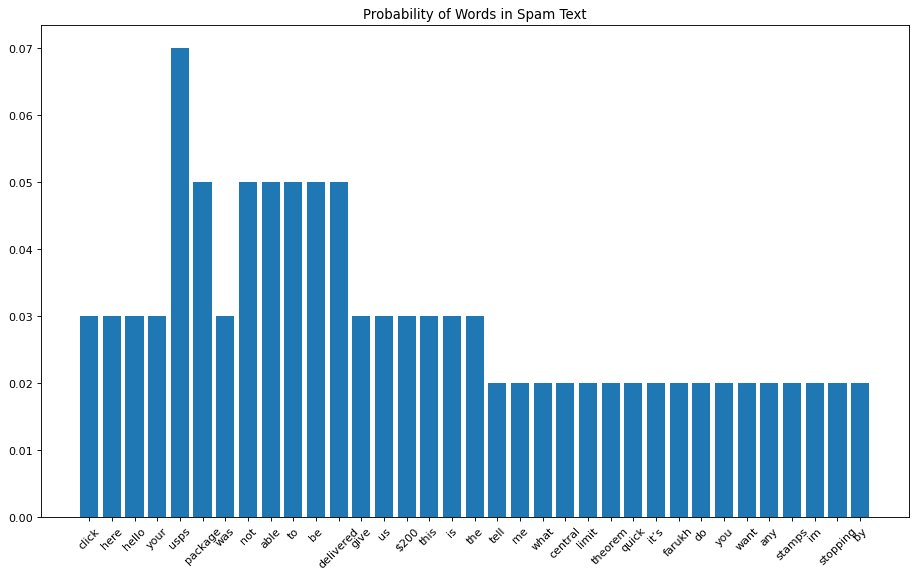

In [431]:
import matplotlib.pyplot as plt

# display smoothed values of spam texts
plt.figure(figsize=(14, 8), dpi=80)
plt.bar(smoothed_spam_prob.keys(), smoothed_spam_prob.values())
plt.xticks(rotation=45)
plt.title("Probability of Words in Spam Text")
plt.show()

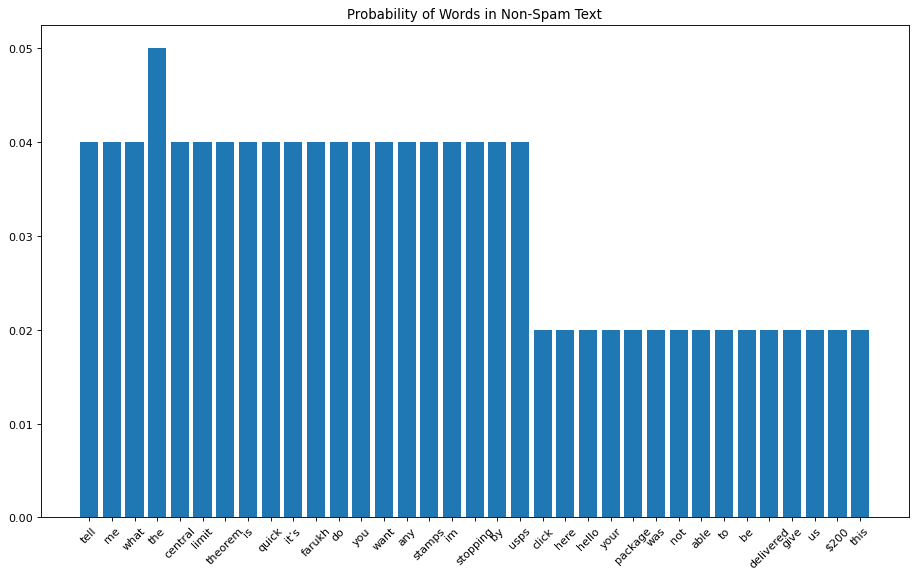

In [432]:
# display smoothed values
plt.figure(figsize=(14, 8), dpi=80)
plt.bar(smoothed_nospam_prob.keys(), smoothed_nospam_prob.values())
plt.xticks(rotation=45)
plt.title("Probability of Words in Non-Spam Text")
plt.show()

Let's re-calculate the probability of our previous spam text using our smoothed values.

In [433]:
new_text3 = "Farukh USPS $200"

# apply text transformation
new_text3 = new_text3.replace(".", "").replace("!", "")
new_text3 = new_text3.lower().split()

spam_likelihood = spam_probability
not_spam_likelihood = not_spam_probability

for w in new_text3:
    # for simplicity, we will ignore words we haven't seen
    if w in spam_prob and w in nospam_prob:
        spam_likelihood *= smoothed_spam_prob[w]
        not_spam_likelihood *= smoothed_nospam_prob[w]

print(f"Likelihood of spam is {spam_likelihood}")
print(f"Likelihood of notspam is {not_spam_likelihood}")

Likelihood of spam is 2.5200000000000003e-05
Likelihood of notspam is 1.2800000000000001e-05


## Exploring the Naive Assumption of Independence 

In a Naive Bayes Classifier, the features (or predictors) are assumed to be independent. This exercise demonstrates that multiplying likelihoods yields the same result regardless of the order of the factors. Such properties are often leveraged in production models when working with complex datasets.

Let's say we get a "different" set of text messages, which are just our original text messages in a different order.

Replace your original text messages with this new code block. Do we get the same probabilities all over again?

In [434]:
# Plug and Play Code Block for Exercise 3
spam_texts = [
    "Click here! Hello, your USPS package was not able to be delivered.",
    "to be delivered! not package able USPS",
    "Give us $200. This is the USPS."
]

# Non-spam text data
normal_texts = [
    "Tell me what the central limit theorem is. Quick, it’s Farukh",
    "Do you want any stamps? I'm stopping by the USPS.",
]

## Gaussian Naïve Bayes Classifier with sklearn on our Dog/Cat/Hamster Dataset

Assume we're working for a startup that uses "AI" to find the best pet. We start with a dataset that describes the amount of kibble an animal eats, as well as the amount of decibel noise it emits.

Let's use our Naive Bayes classifier to identify types of animals based on these numerical features.

In [439]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report

In [440]:
data = {
    "kibble_grams": [200, 250, 115, 300, 50, 138, 128, 142, 280, 317, 282, 270, 69, 32, 31],
    "noise_dB":     [ 40,  60,  45,  80, 75,  38,  49,  42,  76,  88,  80,  73, 77, 75, 77],
    "animal": [
        "cat", "dog", "cat", "dog", "hamster",
        "cat", "cat", "cat",
        "dog", "dog", "dog", "dog",
        "hamster", "hamster", "hamster"
    ]
}

# Convert to DataFrame
df = pd.DataFrame(data)

df.head()

,kibble_grams,noise_dB,animal
0,200,40,cat
1,250,60,dog
2,115,45,cat
3,300,80,dog
4,50,75,hamster


In [ ]:
# select predictors & target
X = df.drop(columns=["animal"])
y = df["animal"]

# create a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# create a Gaussian NB classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# generate predictions and display
y_pred = gnb.predict(X_test)
y_pred

array(['dog', 'dog', 'dog', 'hamster', 'cat'], dtype='<U7')

In [444]:
# compare this to the actual target test data
y_test

9         dog
11        dog
0         cat
13    hamster
5         cat
Name: animal, dtype: object

## Gaussian Naïve Bayes Classifier with sklearn (Challenge)

Next, let's implement a Gaussian Naïve Bayes Classifier using the Iris dataset.

We also perform a hyperparameter search using GridSearchCV. 

This exercise reflects practical workflows where model tuning and validation are essential for deploying accurate machine learning models in industry.

In [ ]:
# TODO: load the Iris dataset
iris = ...

# TODO: select your predictors & target
...

# TODO: the dataset into training and testing sets
...

In [ ]:
# TODO: find the name of the smoothing hyperparam using the sklearn docs
# DOCS: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
param_grid = {
    '...': ...
}

# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

In [ ]:
# TODO: set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(...)

# TODO: fit this model on your training data
...

In [ ]:
# retrieve the best model and hyperparameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# TODO: Use the best model to make predictions on the test set
y_pred = ...

# create a classification report and evaluate
class_report = classification_report(y_test, y_pred)

print("Best hyperparameters:", best_params)
print(class_report)

# Conclusion

In this lab, you have explored several key components of the Naive Bayes Classifier:

- Computing posterior probabilities using Bayes' Theorem
- Applying Laplace smoothing to correct for zero counts in word frequencies
- Demonstrating the independence assumption by showing that the product of likelihoods remains unchanged regardless of their ordering
- Implementing and tuning a Gaussian Naïve Bayes Classifier on the Iris dataset

Understanding these techniques is critical not only for academic exercises but also in practical data science roles, such as filtering spam emails or classifying data in real-world applications. Continue to experiment with these examples and extend them to better adapt to the challenges you will face on the job.